In [441]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from joblib import dump, load
from sklearn.svm import SVC

In [442]:
os.chdir("D:\\OneDrive\\Nexus\\New Beginning\\Internships\\CodSoft\\Task 3\\Dataset")

data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [443]:
Null = data.isna().sum().sum()
print(f"Null values found: {Null}")

Null values found: 0


In [444]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [445]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [446]:
col_to_remove = ['RowNumber', 'CustomerId', 'Surname']
data = data.drop(col_to_remove, axis=1)

In [447]:
enc = LabelEncoder()

data['Geography'] = enc.fit_transform(data['Geography'])
data['Gender'] = enc.fit_transform(data['Gender'])

In [448]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


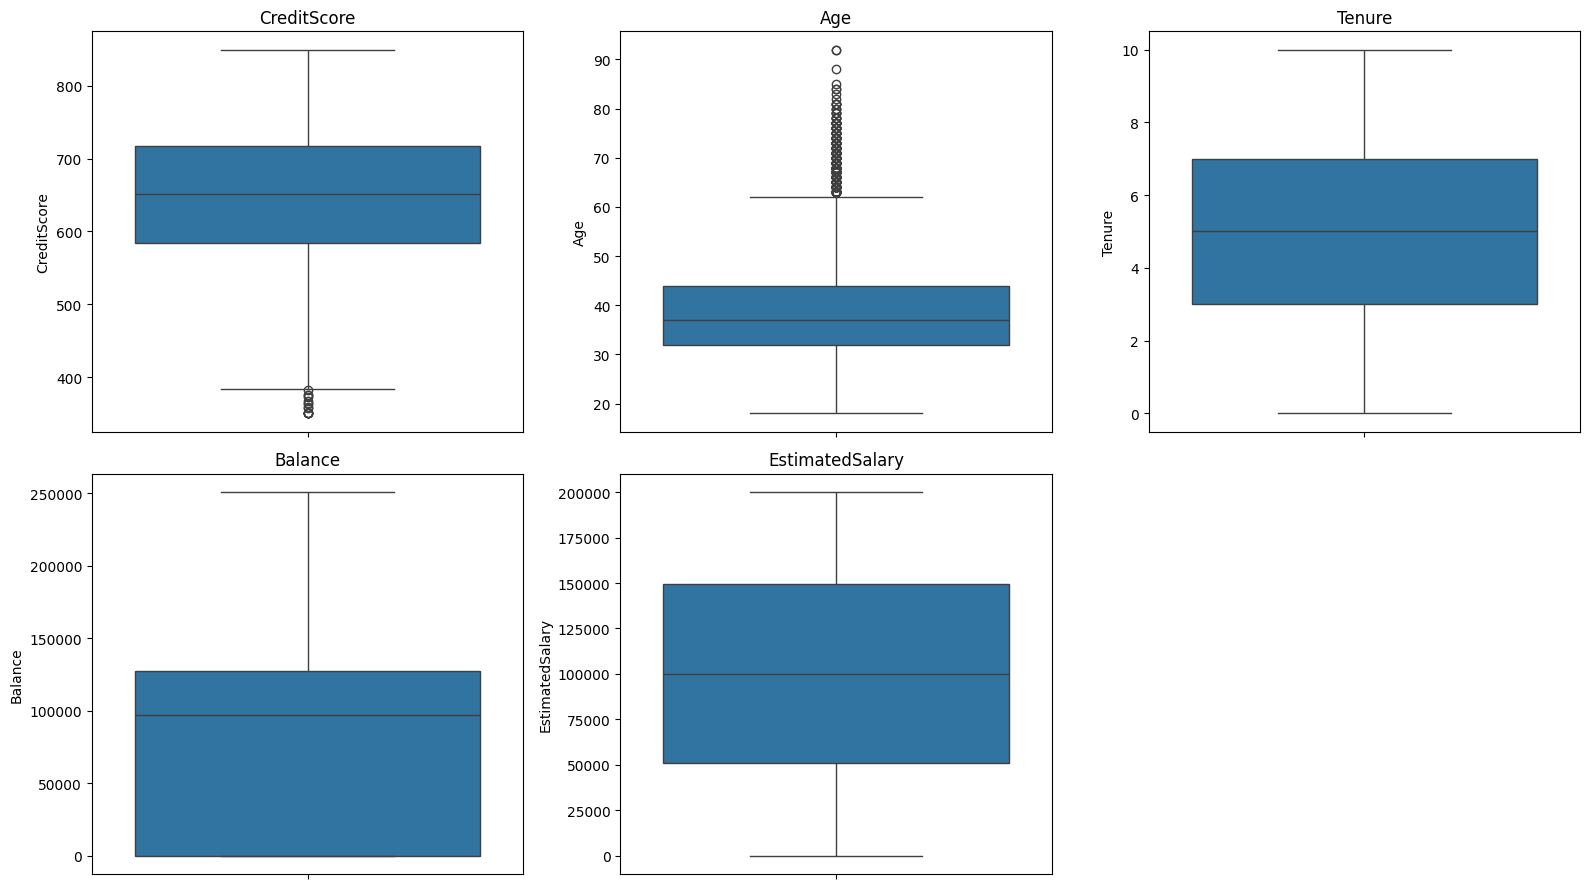

In [449]:
plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(16,9))

for i, column in enumerate(plot,1):
    plt.subplot(2,3,i)
    sns.boxplot(y=data[column])
    plt.title(f"{column}")

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Histogram of Age')

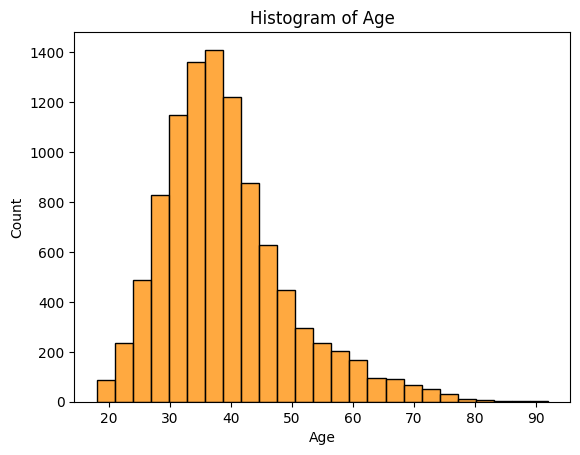

In [450]:
sns.histplot(data["Age"],bins=25, color='darkorange')
plt.title("Histogram of Age")

<Axes: >

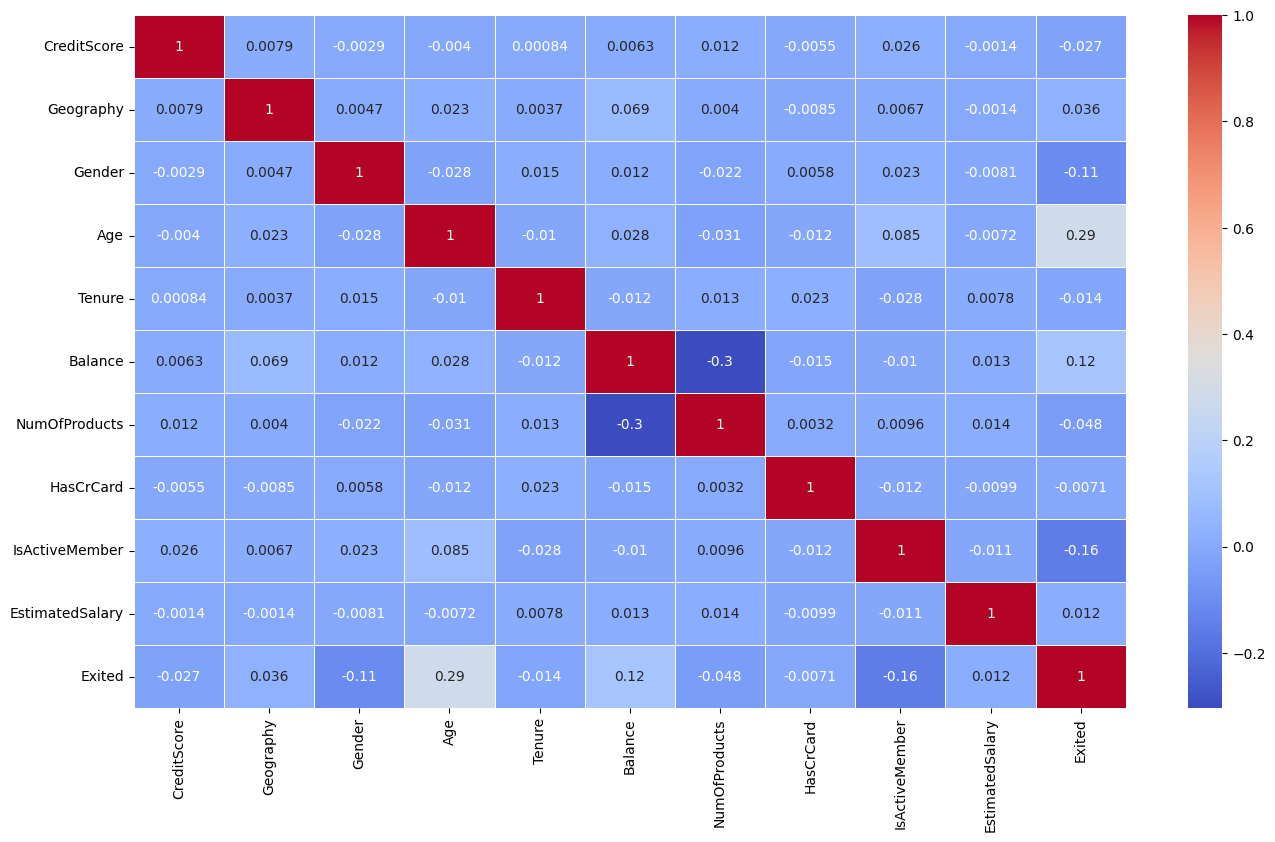

In [451]:
corr = data.corr()
plt.figure(figsize=[16,9])
sns.heatmap(corr, cmap = 'coolwarm', annot=True,linewidths=0.5)

In [452]:
data = data.drop("HasCrCard", axis=1)

In [453]:
#data["BalancePerProducts"] = data["Balance"] / data["NumOfProducts"]
#data = data.drop(["Balance","NumOfProducts"], axis=1)

# Model Deployment

In [454]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,1,112542.58,0
2,502,0,0,42,8,159660.80,3,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,79084.10,0


In [455]:
x = data.drop("Exited", axis=1)
y = data["Exited"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1106)

Models = {
    "Logistic Regression": LogisticRegression(random_state=1106),
    "Decision Tree": DecisionTreeClassifier(random_state=1106),
    "Random Forest": RandomForestClassifier(random_state=1106),
    "Gradient Boosting": GradientBoostingClassifier(random_state=1106),
    "SVM": SVC(random_state=1106)
}

In [456]:
for model,_ in Models.items():
    print(f"-------------------{model}---------------------")
    fit = _.fit(x_train,y_train)
    y_pred = _.predict(x_test)
    conf_mat = pd.DataFrame(confusion_matrix(y_pred,y_test))
    print(f"Accuracy Score: {accuracy_score(y_pred,y_test):.00%}")
    print(conf_mat)
    print(classification_report(y_pred,y_test))
    

-------------------Logistic Regression---------------------
Accuracy Score: 80%
      0    1
0  1558  359
1    44   39
              precision    recall  f1-score   support

           0       0.97      0.81      0.89      1917
           1       0.10      0.47      0.16        83

    accuracy                           0.80      2000
   macro avg       0.54      0.64      0.52      2000
weighted avg       0.94      0.80      0.86      2000

-------------------Decision Tree---------------------
Accuracy Score: 79%
      0    1
0  1392  206
1   210  192
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1598
           1       0.48      0.48      0.48       402

    accuracy                           0.79      2000
   macro avg       0.68      0.67      0.68      2000
weighted avg       0.79      0.79      0.79      2000

-------------------Random Forest---------------------


C:\Users\ishaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 86%
      0    1
0  1539  215
1    63  183
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1754
           1       0.46      0.74      0.57       246

    accuracy                           0.86      2000
   macro avg       0.71      0.81      0.74      2000
weighted avg       0.90      0.86      0.87      2000

-------------------Gradient Boosting---------------------
Accuracy Score: 87%
      0    1
0  1552  214
1    50  184
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1766
           1       0.46      0.79      0.58       234

    accuracy                           0.87      2000
   macro avg       0.72      0.83      0.75      2000
weighted avg       0.91      0.87      0.88      2000

-------------------SVM---------------------
Accuracy Score: 80%
      0    1
0  1602  398
1     0    0
              precision    recall  f1-score   support

           0

C:\Users\ishaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ishaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ishaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: Unde

In [457]:
model_final = GradientBoostingClassifier(random_state=1106).fit(x_train,y_train)

In [458]:
dump(model_final,"Dragon.joblib")

['Dragon.joblib']